# Lab 2 - Basic Signals

### SOLUTION

*This week, the lab will be an assignment to get familar with some basic DSP and audio in Python. Please complete the following problems.*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal

%matplotlib inline

***Remember, you can always use python's help function to learn more about any function or module. For example, see below:***

In [2]:
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

---
## Problem 1 -  Sum of weighted sinusoids

Using the given parameters, create a signal **x** that contains the following sum of sinusoids.

$$ x = \sum_{n=1}^{numFreqs} \frac{\cos( 2 \pi n f_0 t)}{n} $$

Let the sampling rate **fs** be 8000Hz, the duration **dur** be 2 seconds, the fundamental frequency **f0** be 200Hz, and the number of frequencies **numFreqs** be 12. Plot the first 20 milliseconds of the time domain signal. Then plot the magnitude spectrum in the frequency domain from 0Hz to the Nyquist frequency. Finally, listen to your signal.

In [3]:
fs = 8000
dur = 2
f0 = 200
numFreqs = 12

Hint: You may consider using the following functions
- np.arange()
- np.linspace()
- np.cos()
- np.dot()
- plt.xlim()
- plt.plot()
- np.fft.fft()
- np.fft.fftfreq()
- np.absolute()
- ipd.Audio()

Also, you can always check the dimensions of an array with np.shape(). You can use np.reshape() to change this shape.

## Your Answer:

In [4]:
freq = f0*np.arange(1,numFreqs+1)
k = 1./np.arange(1,numFreqs+1)
t = np.linspace(0,dur,(dur*fs))

freq.shape = (numFreqs,1)
k.shape = (1,numFreqs)
t.shape = (1,(dur*fs))

In [5]:
# Generate matrix of sinusoids
X = np.cos(2 * np.pi * freq * t)

In [6]:
# Weight by magnitude vector k and sum
XX = np.dot(k,X)

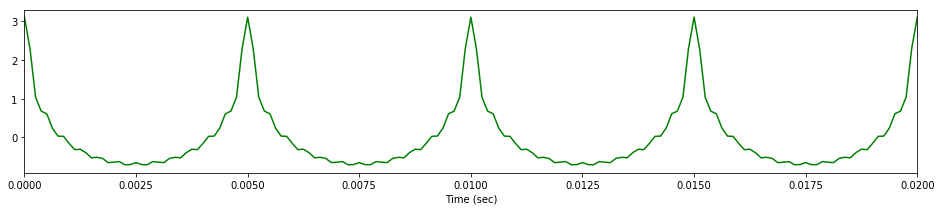

In [7]:
XX.shape = (16000,)
t.shape = (16000,)

plt.figure(figsize = (16,3))
plt.xlim(0,0.02)
plt.xlabel("Time (sec)")
plt.plot(t,XX,"g-");

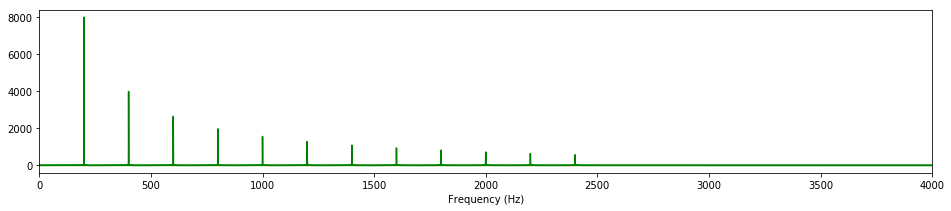

In [8]:
fftXX = np.absolute(np.fft.fft(XX))
f = fs * np.fft.fftfreq(len(XX))

plt.figure(figsize = (16,3))
plt.xlim(0,fs/2)
plt.xlabel("Frequency (Hz)")
plt.plot(f,fftXX,"g-");

In [9]:
ipd.Audio(XX, rate = fs)

---
## Problem 2 - Chirp signal

Create a linear chirp signal whose frequency starts at **f1** of 50Hz and ends after 5 seconds at **f2** of 2kHz. Reminder: a chirp signal is a sinusoid with a constantly changing frequency.

Use a sampling rate of 8000Hz.

Plot the first 200 ms of the chirp in the time domain. Then plot its magnitude and phase spectra in the frequency domain from 0Hz to the Nyquist frequency. Finally, listen to your chirp signal.

In [10]:
f1 = 50
f2 = 2000
dur = 5

Hint: You may consider using the following functions
- np.linspace()
- signal.chirp()
- plt.xlim()
- plt.plot()
- np.fft.fft()
- np.fft.fftfreq()
- np.fft.fftshift()
- np.absolute()
- np.arctan()
- ipd.Audio()


## Your Answer:


In [11]:
chirpT = np.linspace(0,dur,(dur*fs))

c = signal.chirp(chirpT, f0=f1, f1=f2, t1=dur, method='linear')

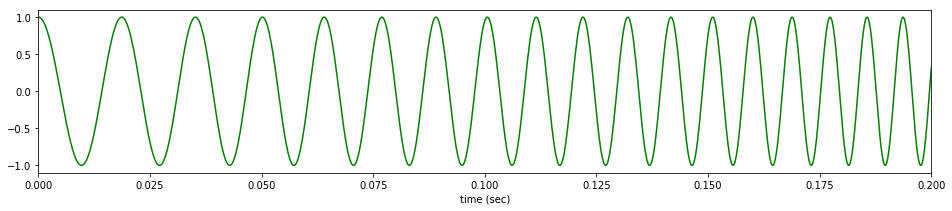

In [12]:
plt.figure(figsize = (16,3))
plt.xlabel("time (sec)")
plt.xlim(0,0.2)
plt.plot(chirpT, c, "g-");

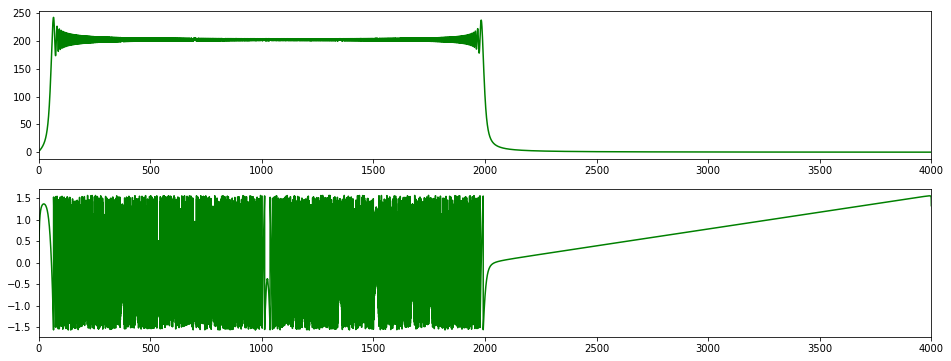

In [13]:
Y = np.fft.fftshift(np.fft.fft(c))
magy = np.absolute(Y)
phasey = np.arctan(np.imag(Y)/np.real(Y))
f = fs * np.fft.fftshift(np.fft.fftfreq(len(Y)))

plt.figure(figsize = (16,6))
plt.subplot(211)
plt.xlim(0,fs/2)
plt.plot(f, magy, "g-")
plt.subplot(212)
plt.xlim(0,fs/2)
plt.plot(f, phasey, "g-");

In [14]:
ipd.Audio(c, rate = fs)